In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score,
                             precision_score, recall_score, f1_score, roc_curve, auc)
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/KFC Dataset.csv')

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Sort the data by date
data.sort_values('Date', inplace=True)

# Calculate the price change
data['Price_Change'] = data['Close'].diff()
data.dropna(inplace=True)

# Create target variable: Up (1) or Down (0)
data['Target'] = (data['Price_Change'] > 0).astype(int)

# Select features and target
features = ['Open', 'High', 'Low', 'Volume']
X = data[features]
y = data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
# Logistic Regression Hyperparameter Tuning
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train_scaled, y_train)

# Best parameters and estimator for Logistic Regression
best_params_lr = grid_search_lr.best_params_
best_model_lr = grid_search_lr.best_estimator_

print("Best parameters for Logistic Regression:", best_params_lr)

# Random Forest Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_scaled, y_train)

# Best parameters and estimator for Random Forest
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

print("Best parameters for Random Forest:", best_params_rf)


Best parameters for Logistic Regression: {'C': 100, 'solver': 'lbfgs'}
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}



Logistic Regression Performance:
Accuracy: 0.7493775933609959
Precision: 0.6721311475409836
Recall: 0.23837209302325582
F1 Score: 0.351931330472103

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.95      0.84       861
           1       0.67      0.24      0.35       344

    accuracy                           0.75      1205
   macro avg       0.72      0.60      0.60      1205
weighted avg       0.73      0.75      0.70      1205



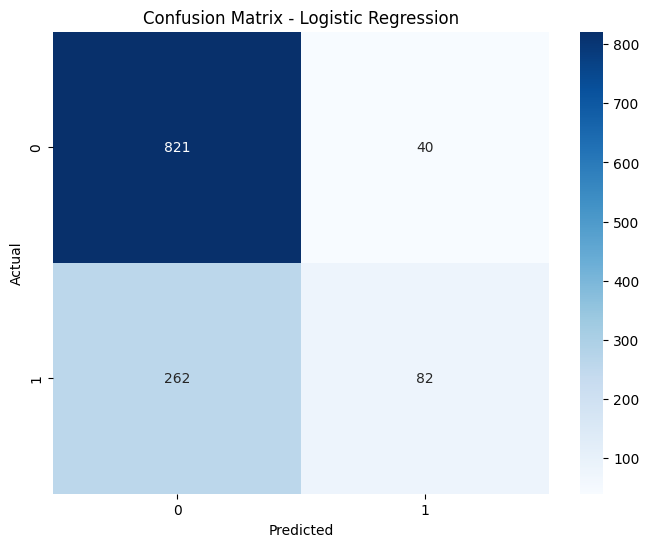


Random Forest Performance:
Accuracy: 0.7344398340248963
Precision: 0.5535714285714286
Recall: 0.36046511627906974
F1 Score: 0.4366197183098592

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83       861
           1       0.55      0.36      0.44       344

    accuracy                           0.73      1205
   macro avg       0.66      0.62      0.63      1205
weighted avg       0.71      0.73      0.72      1205



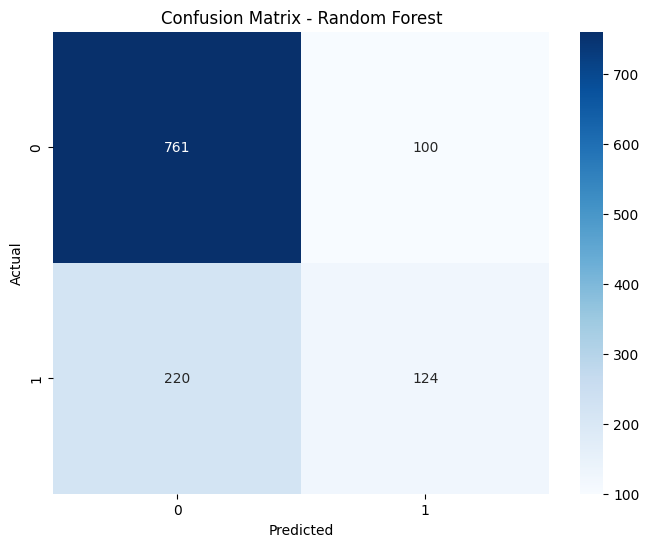

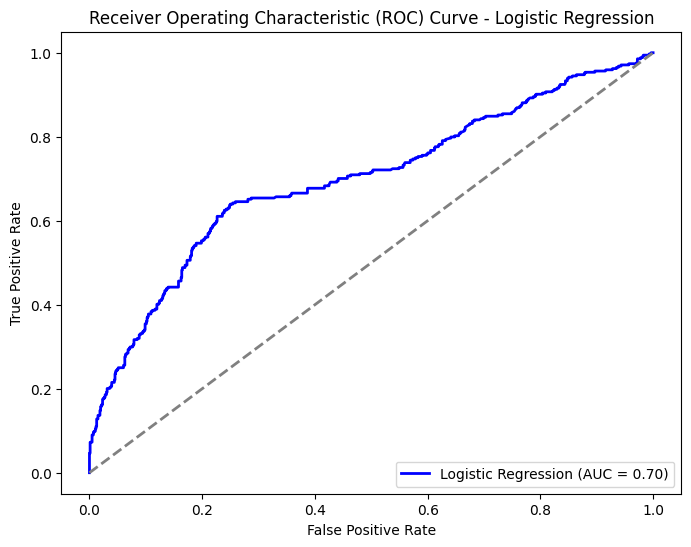

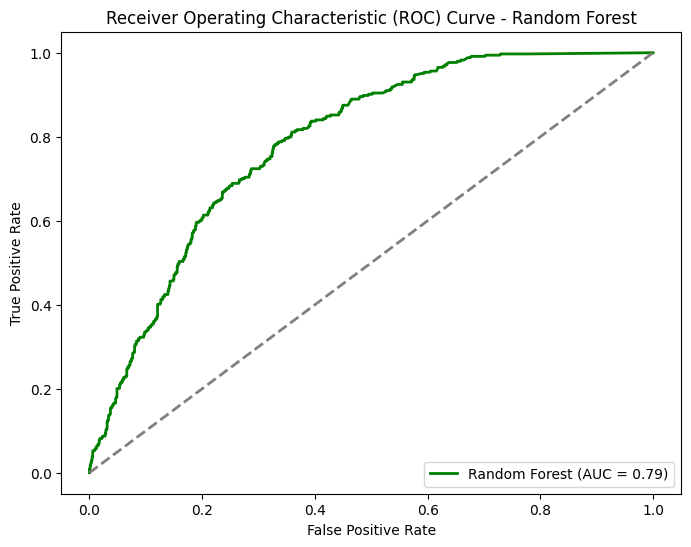

In [6]:
# Evaluate Logistic Regression
y_pred_lr = best_model_lr.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("\nLogistic Regression Performance:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Evaluate Random Forest
y_pred_rf = best_model_rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("\nRandom Forest Performance:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# ROC Curve and AUC for Logistic Regression
y_pred_prob_lr = best_model_lr.predict_proba(X_test_scaled)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# ROC Curve and AUC for Random Forest
y_pred_prob_rf = best_model_rf.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()
